In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import see_fits
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
from scipy.ndimage import gaussian_filter
sys.path.append('../modules')
import covariance as covar
import utils
import abundance as cl_count
import forecast
import pyccl as ccl
import edit
import h5py

/pbs/home/c/cpayerne/.conda/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sigma_data = .05
theta_fiducial = [5,5.2]
x_data = np.linspace(1, 2, 5)
w=1.1
def model(theta):
    theta1, theta2 = theta
    y_data = (theta1**1.2 * x_data/10 + theta2**1.5/10 + theta1**.5*theta2**.5/2) ** w * x_data
    return y_data

In [3]:
Var_data = np.eye(len(x_data))*sigma_data**2
deriv = forecast.first_derivative(theta_fiducial, model, (1,len(x_data)), delta = 1e-4)
var_pred = np.dot(deriv, np.linalg.inv(Var_data)) * deriv

In [4]:
deriv1= forecast.first_derivative(theta_fiducial, model, (1,len(x_data)), delta = 1e-4)

In [5]:
deriv2=forecast.second_derivative(theta_fiducial, model, (1,len(x_data)), delta = 1e-4)

In [6]:
model_fiducial = model(theta_fiducial)

In [7]:
def posterior(theta, y_data):
    return np.prod(np.exp(-(model(theta) - y_data)**2/(2*sigma_data**2)))

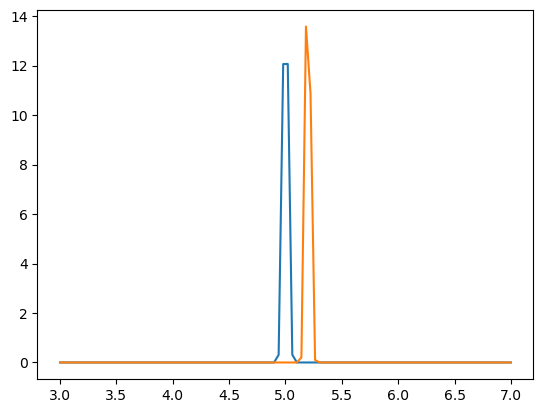

In [19]:
theta_ax = np.linspace(3., 7, 100)
dt = theta_ax[1]-theta_ax[0]
posterior_tab = np.array([posterior([t,theta_fiducial[1]], model_fiducial) for t in theta_ax])
plt.plot(theta_ax, posterior_tab/np.sum(posterior_tab*dt))
posterior_tab = np.array([posterior([theta_fiducial[0],t], model_fiducial) for t in theta_ax])
plt.plot(theta_ax, posterior_tab/np.sum(posterior_tab*dt))

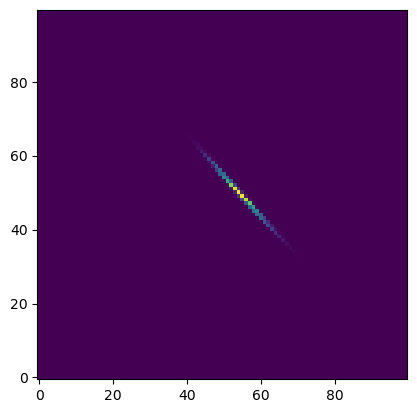

In [20]:
posterior_tab = np.zeros([len(theta_ax), len(theta_ax)])
for k in range(len(theta_ax)):
        posterior_tab[k,:] = np.array([posterior([theta_ax[k], t], model_fiducial) for t in theta_ax])
plt.imshow(posterior_tab, origin='lower', )

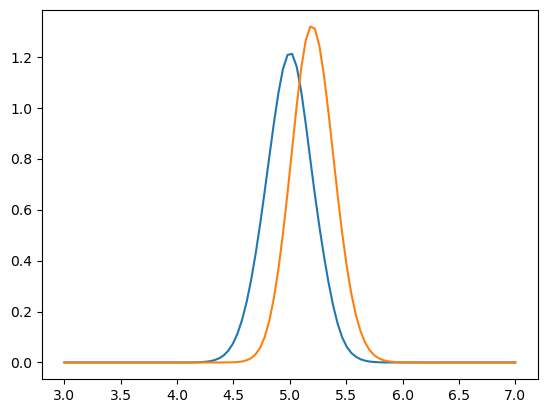

In [21]:
plt.plot(theta_ax, np.sum(posterior_tab, axis=1))
plt.plot(theta_ax, np.sum(posterior_tab, axis=0))

In [22]:
n = 30
mean1 = []
mean2 = []
variance1 = []
variance2 = []
dt = theta_ax[1] - theta_ax[0]
for i in range(n):
    y_datas = model_fiducial + sigma_data*np.random.randn(len(x_data))
    posterior_tab = np.zeros([len(theta_ax), len(theta_ax)])
    for k in range(len(theta_ax)):
        posterior_tab[k,:] = np.array([posterior([theta_ax[k], t], y_datas) for t in theta_ax])
    
    p1 = np.sum(posterior_tab, axis=1)
    mean_1i = np.trapz(p1*theta_ax, x=theta_ax)/np.trapz(p1, x=theta_ax)
    mean_1i2 = np.trapz(p1*theta_ax**2, x=theta_ax)/np.trapz(p1, x=theta_ax)
    variance1.append(mean_1i2 - mean_1i**2)
    mean1.append(mean_1i)
    
    p2 = np.sum(posterior_tab, axis=0)
    mean_2i = np.trapz(p2*theta_ax, x=theta_ax)/np.trapz(p2, x=theta_ax)
    mean2.append(mean_2i)
    mean_2i2 = np.trapz(p2*theta_ax**2, x=theta_ax)/np.trapz(p2, x=theta_ax)
    variance2.append(mean_2i2 - mean_2i**2)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


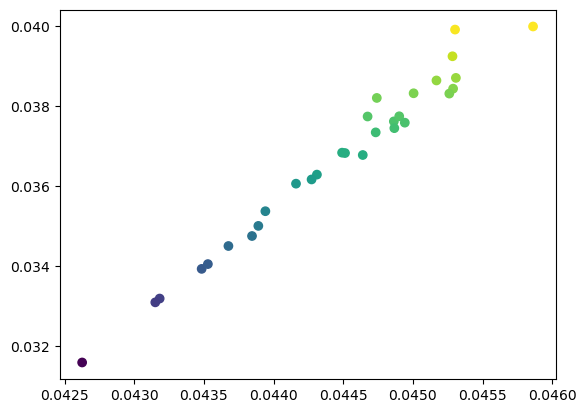

In [24]:
plt.scatter(variance1, variance2, c=variance2,)

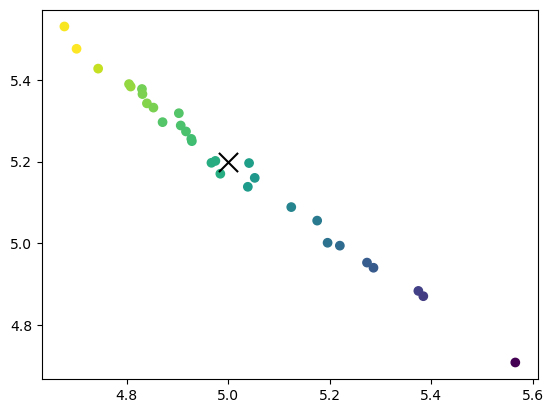

In [23]:
plt.scatter(mean1, mean2, c=variance2,)
plt.scatter(theta_fiducial[0], theta_fiducial[1], marker='x', s=190, color='k')